# Gradient decent

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display

## 1. Declare function
- Cost funtion: $J(x)=0.15x^2+{\pi sin(x)\over3}$
- Gradient: $J'(x)=0.3x+{\pi cos(x)\over3}$
- At *i-th* step: $x[i+1]=x[i]-\alpha*0.3x+{\pi cos(x)\over3}$

In [12]:
def cost(x: float) -> float:
    return 0.15 * x**2 + math.pi*math.sin(x)/3

In [13]:
def grad_normal(x: float) -> float:
    return 0.3 * x + math.pi * math.cos(x)/3

def grad(x: float) -> float:
    return grad_normal(x)

In [14]:
def plot(x: np.ndarray, y: np.ndarray, x0: float, y0: float, x1: float, y1: float) -> None:
    plt.plot(x, y, 'b-', x0, y0, 'ro', x1, y1, 'yo', [x0, x1], [y0, y1], 'g-')
    return

### 1. Normal Gradient Descent

In [15]:
def grad_desc_normal(eta, x0):
    stop_threadhold = 0.001
    x = [x0]
    it = 0
    y = [cost(x0)]
    x_ = np.arange(-16, 16, 0.01)
    y_ = np.asarray([cost(i) for i in x_], dtype=float)
    plt.ion()
    for it in range(101):
        x_new= x[-1] - eta*grad(x[-1])
        
        if abs(grad(x_new)) < stop_threadhold:#1e-3:
            break
        x.append(x_new)
        y.append(cost(x_new))

    for i in range(1, len(x)):
        plt.clf()
        plot(x_, y_, x[i-1], y[i-1], x[i], y[i])
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(0.1)
        pass
    plt.close()
    return x, it

### 2. Momentium Gradient Descent

In [16]:
def grad_desc_momentium(eta, x0):
    stop_threadhold = 0.001
    gamma = 0.9
    x = [x0]
    it = 0
    y = [cost(x0)]
    x_ = np.arange(-16, 16, 0.01)
    y_ = np.asarray([cost(i) for i in x_], dtype=float)
    plt.ion()
    for it in range(101):
        if len(x) > 1:
            # normal momentium
            # x_new= x[-1] - (gamma*abs(x[-1] - x[-2]) + eta*grad(x[-1]))
            # with Nesterov accelerated gradient NAG
            x_new= x[-1] - (gamma*abs(x[-1] - x[-2]) + eta*grad(x[-1] - gamma*abs(x[-1] - x[-2])))
        else:
            x_new=x[-1] - gamma * eta*grad(x[-1])
        # x_new = gamma * x[-1] - (np.sign(x[-1]))*math.pow(math.e, math.log(eta) + math.log(abs(grad(x[-1]))) )
        # if (len(x) > 1 and abs(grad(x_new)) < (abs(grad(x[-1])) - abs(grad(x[-2])))/2) or abs(grad(x_new)) < stop_threadhold: #1e-3:
        if abs(grad(x_new)) < stop_threadhold: #1e-3:
            break
        x.append(x_new)
        y.append(cost(x_new))
    
    for i in range(1, len(x)):
        plt.clf()
        plot(x_, y_, x[i-1], y[i-1], x[i], y[i])
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(0.05)
        pass
    plt.close()
    return x, it

## 2.Test

### 1. Normal

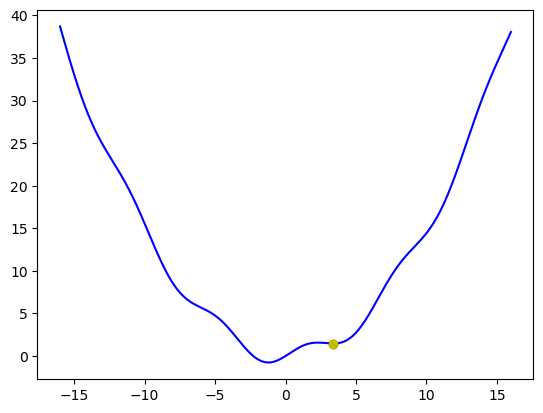

Normal x1 = -1.216007, cost = -0.760177, obtained after 35 iterations
Normal x2 = 3.388386, cost = 1.466348, obtained after 43 iterations


In [17]:
eta = .3
x0=-15
(x1, it1) = grad_desc_normal(eta=eta, x0=x0)
# plt.show()
time.sleep(3)
x0=15
(x2, it2) = grad_desc_normal(eta=eta, x0=x0)
# plt.show()
print('Normal x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Normal x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))

### 2. Momentium

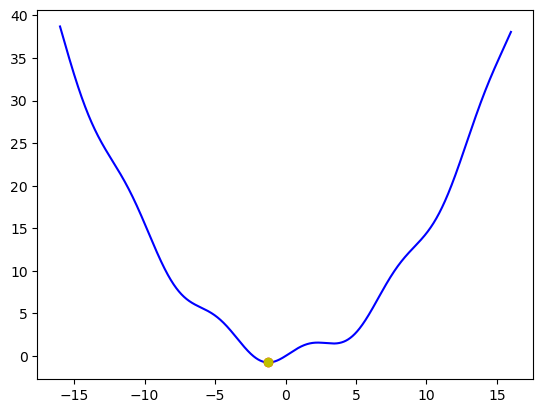

Momentium x1 = -1.216077, cost = -0.760177, obtained after 66 iterations
Momentium x2 = -1.216082, cost = -0.760177, obtained after 48 iterations


In [18]:
eta =.3
x0=-15
(x1, it1) = grad_desc_momentium(eta=eta, x0=x0)
# plt.show()
x0=15
(x2, it2) = grad_desc_momentium(eta=eta, x0=x0)
# plt.show()
print('Momentium x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Momentium x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))